In [2]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import h5py
import json
import pickle
import glob
import socket
import os

In [3]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/2021-01-27-V24/*/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/2021-01-27-V24/*/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/2021-01-27-V24/*/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\3_Phase_B-E\\20210201_3_Phase_B-E_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\5_Phase_A-D\\20210218_5_Phase_A-D_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\7_Phase_C-F\\20210218_7_Phase_C-F_LEM2.h5',
 'C:\\LINHC\\VersucheDBs

20210218_5_Phase_A-D_LEM1
ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>
Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>
Points:
(1069543,)


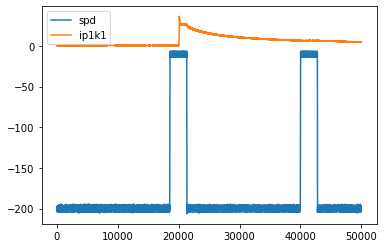

In [5]:
# choose 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\4_Phase_C-F\\20210202_4_Phase_C-F_LEM1.h5'
file = file_list[6]
filename = file.split('\\')[-1][:-3]
h51 = h5py.File(file, "r")

print(filename)
print("ATTR:")
print(h51.attrs.keys())
print("Keys:")
print(h51.keys())
print("Points:")
print(h51['t'].shape)

plt.plot(h51['spd1'][:50000], label = 'spd')
plt.plot(h51['ip1k1'][:50000], label = 'ip1k1')
plt.legend()

In [6]:
low = np.where(h51['spd1'][:]>-50)[0]
# skip the lsa in first 10000 points because some wierd patterns in speed, 
# check 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5', 
if filename in ['20210127_Phase_A-D_LEM2']:
    low = low[low>10000]
pos_low = h51['pos1'][low]
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)
Ls = np.append(low[low_sep],low[-1])
Fs = np.append(low[0],low[low_sep+1])
if filename in ["20210218_7_Phase_C-F_LEM1","20210218_7_Phase_C-F_LEM2"]:
    Ls = Ls[:-1]
    Fs = Fs[:-1]
print("timestamps of Fs:\n", Fs)
print("timestamps of Ls:\n", Ls)
print("Durations of lsa:\n", Ls-Fs)

timestamps of Fs:
 [  18565   40020   61478   82938  104393  125852  147310  168767  190223
  211683  233142  254600  276057  297516  318972  340428  361883  383343
  404801  426258  447713  469169  490626  512082  533541  554997  576453
  597913  619371  640828  662283  683742  705202  726664  748121  769577
  791035  812495  833951  855409  876867  898322  919777  941237  962697
  984158 1005617 1027074 1048529]
timestamps of Ls:
 [  21336   42795   64255   85710  107169  128626  150084  171540  193000
  214459  235916  257374  278832  300290  321744  343200  364660  386117
  407574  429030  450486  471942  493398  514857  536313  557771  579229
  600687  622145  643599  665059  686519  707981  729437  750894  772351
  793811  815267  836725  858183  879638  901094  922554  944014  965475
  986933 1008391 1029846 1051303]
Durations of lsa:
 [2771 2775 2777 2772 2776 2774 2774 2773 2777 2776 2774 2774 2775 2774
 2772 2772 2777 2774 2773 2772 2773 2773 2772 2775 2772 2774 2776 2774
 27

In [7]:
shift_opts_freqs = pickle.load( open( DIR + "/data/shift_opts_freqs/" +filename + ".pkl", "rb" ) )
shift_opts_freqs.shape

(121, 49)

In [8]:
X = np.array(h51['t'][Fs]).reshape(-1,1)
y = np.array(shift_opts_freqs[0]).reshape(-1,1)

<AxesSubplot:>

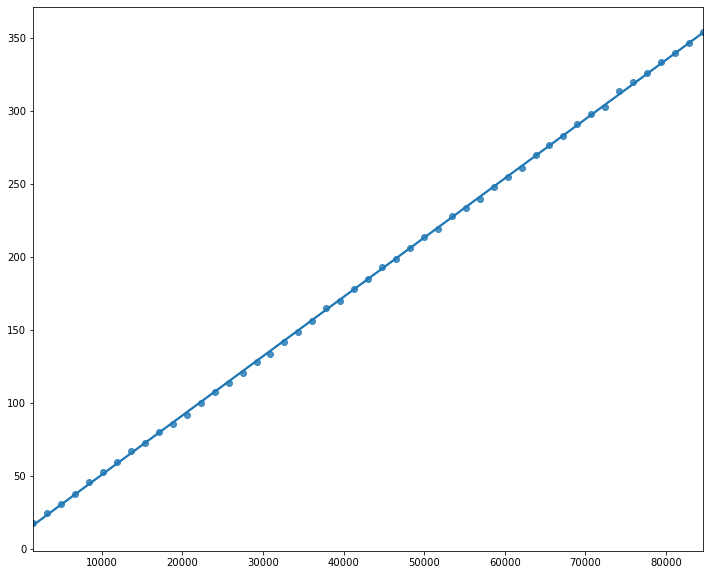

In [9]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

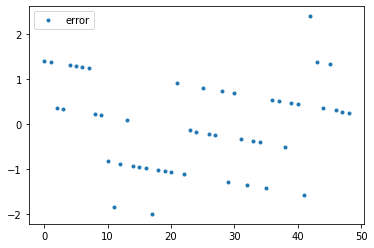

In [11]:
err = y - reg.predict(X)
plt.plot(err,'.',label = 'error')
plt.legend()

In [12]:
shift_opts_freqs[0]

array([ 18,  25,  31,  38,  46,  53,  60,  67,  73,  80,  86,  92, 100,
       108, 114, 121, 128, 134, 142, 149, 156, 165, 170, 178, 185, 193,
       199, 206, 214, 219, 228, 234, 240, 248, 255, 261, 270, 277, 283,
       291, 298, 303, 314, 320, 326, 334, 340, 347, 354])

In [13]:
shift = reg.predict(np.array(h51['t']).reshape(-1,1))
t_shift = np.array(h51['t']).reshape(-1,1) - shift

In [14]:
shift.shape

(1069543, 1)

In [15]:
shift.round()

array([[ 11.],
       [ 11.],
       [ 11.],
       ...,
       [361.],
       [361.],
       [361.]])

## LR

In [16]:
shift_opts_freqs_all = []
for i in range (121):
    X = np.array(h51['t'][Fs]).reshape(-1,1)
    y = np.array(shift_opts_freqs[i]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    shift = reg.predict(np.array(h51['t']).reshape(-1,1))
    shift_opts_freqs_all.append(shift)

In [17]:
shift_opts_freqs_all = np.array(shift_opts_freqs_all).squeeze()
shift_opts_freqs_all.shape

(121, 1069543)

## Check

In [18]:
shift_opts_freqs[10] # grid search

array([ 18,  26,  33,  39,  47,  53,  60,  67,  74,  81,  88,  95, 103,
       111, 117, 124, 131, 137, 144, 151, 158, 165, 171, 179, 185, 193,
       199, 205, 214, 220, 228, 234, 241, 248, 255, 261, 269, 276, 283,
       290, 297, 303, 313, 319, 326, 333, 340, 347, 354])

In [19]:
shift_opts_freqs_all[10][Fs].round() # LR

array([ 19.,  25.,  32.,  39.,  46.,  53.,  60.,  67.,  74.,  81.,  88.,
        95., 102., 109., 116., 123., 130., 137., 144., 151., 158., 165.,
       172., 179., 186., 193., 200., 207., 214., 221., 228., 235., 242.,
       249., 256., 263., 269., 276., 283., 290., 297., 304., 311., 318.,
       325., 332., 339., 346., 353.])

# LR for ALL

In [10]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import h5py
import json
import pickle
import glob
from sklearn.linear_model import LinearRegression

# DIR = "C:/LINHC/Software/Python/L737/scribble/xin/trelleborg"
DIR = "/home/xin/projects/trelleborg"

DATASET = "/storage/xin/datasets/Trelleborg/2021-01-27-V24/*/*.h5"

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)

for file in file_list:
## Loading files
    # filename = file.split('\\')[-1][:-3]
    filename = file.split('/')[-1][:-3]
    shift_opts_freqs = pickle.load( open( DIR + "/data/shift_opts_freqs/" +filename + ".pkl", "rb" ) )
    with h5py.File(file, "r") as h51:
        low = np.where(h51['spd1'][:]>-50)[0]
        # skip the lsa in first 10000 points because some wierd patterns in speed, 
        # check 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24\\2_Phase_A-D\\20210127_Phase_A-D_LEM2.h5', 
        low = low[low>10000]
        pos_low = h51['pos1'][low]
        low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
        pos_low_sep = np.split(pos_low,low_sep+1)
        Ls = np.append(low[low_sep],low[-1])
        Fs = np.append(low[0],low[low_sep+1])
        if filename in ["20210218_7_Phase_C-F_LEM1","20210218_7_Phase_C-F_LEM2"]:
            Ls = Ls[:-1]
            Fs = Fs[:-1]
## LR for all frequencies
        shift_opts_freqs_all = []
        for i in range (121):
            X = np.array(h51['t'][Fs]).reshape(-1,1)
            y = np.array(shift_opts_freqs[i]).reshape(-1,1)
            reg = LinearRegression().fit(X, y)
            shift = reg.predict(np.array(h51['t']).reshape(-1,1)).reshape(-1)
            # LR predicted shift "shfit" should not be more than 2 points away from 
            # grid-search-based "shift "shift_opts_freqs[i]"
            assert all(abs(shift[Fs]-shift_opts_freqs[i]))<2
            shift_opts_freqs_all.append(shift)
        shift_opts_freqs_all = np.array(shift_opts_freqs_all).squeeze().round().astype(int)
        assert shift_opts_freqs_all.shape[0] == 121
        pklName = DIR + '/data/shift_opts_freqs_all/' + filename + '.pkl'
        pickle.dump(shift_opts_freqs_all, open(pklName, 'wb')) 
